# HW05

## a)

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
emergency=pd.read_csv(r'/Users/liaonicole/Desktop/Liao_YunXuan/hw05/data/emergency.csv',names=['description'])
emergency.head()

,description
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1,75YOF WITH LAC TO FINGER FROM METAL CAN
2,8YOF FRACTURED FINGER FELL OFF HER BIKE
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...
4,PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...


In [2]:
emergency['length']=emergency.description.str.len()
emergency[emergency['length'] == emergency['length'].max()]

,description,length
109,40YOM-C/O FOOT/HEEL PAIN RUNNIJNG BACKWARDS FE...,143
511,19MOWF PARENTS HOLDING PT. DAD STATES SHE WA...,143
630,44YOF PT HAVING SEVERE R ARM PAIN THAT IS RAD...,143
920,57 YO F WAS POURING KEROSENE OVER AN OPEN FLAM...,143
1111,"13YOM DID OUTDOOR WORKOUT X1 1/2 HRS, DEVELOEP...",143
...,...,...
9370,"20 YO M, RUNNING FROM POLICE AFTER AN ALLEGED ...",143
9666,22YOM WAS LIGHTING PROPANE PIZZA OVEN ON FRI. ...,143
9670,45YOWM TONIGHT PT WAS TRYING TO MOVE HIS FATH...,143
9749,"PT.INJ.NOSE,HAND,WRIST,ELBOW WHEN RIDING BIKE ...",143


In [3]:
emergency[emergency['length'] == emergency['length'].min()]

,description,length
7127,ABR HIP ON FLOOR,17
7731,INGESTION OF ***,17


## b)

In [4]:
fracture=emergency[emergency.iloc[:,0].str.contains(r'FRAC\w*|FX')] 


## c)

In [5]:
fracture=emergency[emergency.iloc[:,0].str.contains(r'FRAC\w*|FX')] 
parts=['FINGER','FOOT','KNEE','TOE','ANKLE','LEG','WRIST','ELBOW','HAND','ARM','HIP']

fractureParts={}
for i in parts:
    frequency=sum(fracture.iloc[:,0].str.contains(i))
    fractureParts[i] = [frequency]
print(fractureParts)

{'FINGER': [144], 'FOOT': [175], 'KNEE': [34], 'TOE': [79], 'ANKLE': [130], 'LEG': [70], 'WRIST': [147], 'ELBOW': [84], 'HAND': [143], 'ARM': [168], 'HIP': [84]}


Text(0, 0.5, 'Frequency')

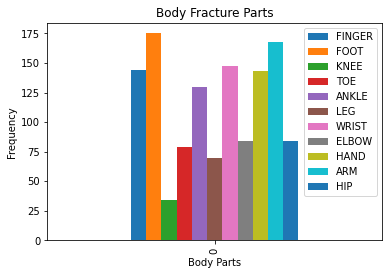

In [6]:
fracturePartsdf=pd.DataFrame.from_dict(fractureParts)
fracturePartsdf.plot(kind = 'bar')
plt.title ("Body Fracture Parts")
plt.xlabel ("Body Parts")
plt.ylabel ("Frequency")

## d)

In [7]:
emergency2=pd.read_csv(r'/Users/liaonicole/Desktop/Liao_YunXuan/hw05/data/emergency.csv',names=['description'])
emergency2.head()

,description
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1,75YOF WITH LAC TO FINGER FROM METAL CAN
2,8YOF FRACTURED FINGER FELL OFF HER BIKE
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...
4,PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...


In [8]:
age_gender=emergency2[emergency2.iloc[:,0].str.contains(r'(\d*).?(YO|YR|MO).?(M|F)')] 
age_gender.head()

/Users/liaonicole/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,description
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1,75YOF WITH LAC TO FINGER FROM METAL CAN
2,8YOF FRACTURED FINGER FELL OFF HER BIKE
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...
5,DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL...


In [9]:
gen=[]
for i in age_gender.iloc[:,0]:
    x=re.search(r'(\d*).?(YO|YR|MO).?(M|F)',i)
    #print(x)
    gen.append(x.group(3))
age_gender["gender"]=gen
age_gender.head()

<ipython-input-9-e0d4bc8aeb45>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_gender["gender"]=gen


,description,gender
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...,F
1,75YOF WITH LAC TO FINGER FROM METAL CAN,F
2,8YOF FRACTURED FINGER FELL OFF HER BIKE,F
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...,M
5,DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL...,M


In [10]:
age=[]
for i in age_gender.iloc[:,0]:
    x=re.search(r'(\d*).?(YO|YR|MO).?(M|F)',i)
    age.append(x.group(2))
age_gender["age"]=age
age_gender.head()

<ipython-input-10-68651004691d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_gender["age"]=age


,description,gender,age
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...,F,MO
1,75YOF WITH LAC TO FINGER FROM METAL CAN,F,YO
2,8YOF FRACTURED FINGER FELL OFF HER BIKE,F,YO
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...,M,YO
5,DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL...,M,YO


In [11]:
pattern=r'(\d*).?(YO|YR|MO).?(M|F)'
age_gender['year'] = [number.group(1) for number in [re.search(pattern, n) for n in age_gender['description']] if number]
age_gender.head()

<ipython-input-11-ed24965a5f86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_gender['year'] = [number.group(1) for number in [re.search(pattern, n) for n in age_gender['description']] if number]


,description,gender,age,year
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...,F,MO,10
1,75YOF WITH LAC TO FINGER FROM METAL CAN,F,YO,75
2,8YOF FRACTURED FINGER FELL OFF HER BIKE,F,YO,8
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...,M,YO,9
5,DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL...,M,YO,9


In [12]:
age_gender['year']= pd.to_numeric(age_gender['year'])

<ipython-input-12-f2b2cb8dc182>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_gender['year']= pd.to_numeric(age_gender['year'])


In [13]:
age_gender['year']=np.where(age_gender['age']=='MO',age_gender['year']/12,age_gender['year'])
age_gender['age']=np.where(age_gender['age']=='MO',age_gender['age']=='YO',age_gender['age'])
age_gender.head()

<ipython-input-13-be0f76e5beac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_gender['year']=np.where(age_gender['age']=='MO',age_gender['year']/12,age_gender['year'])
<ipython-input-13-be0f76e5beac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_gender['age']=np.where(age_gender['age']=='MO',age_gender['age']=='YO',age_gender['age'])


,description,gender,age,year
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...,F,False,0.833333
1,75YOF WITH LAC TO FINGER FROM METAL CAN,F,YO,75.000000
2,8YOF FRACTURED FINGER FELL OFF HER BIKE,F,YO,8.000000
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...,M,YO,9.000000
5,DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL...,M,YO,9.000000


In [14]:
gender= age_gender.groupby('gender')
gender.size()

gender
F    3225
M    4203
dtype: int64

In [31]:
graphdf=age_gender.groupby(['gender', 'year'])['description'].count().reset_index(name='frequency')
graphdf.head()

,gender,year,frequency
0,F,0.083333,7
1,F,0.166667,3
2,F,0.250000,3
3,F,0.333333,6
4,F,0.416667,9


[Text(0.5, 1.0, 'Injury'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Injuries')]

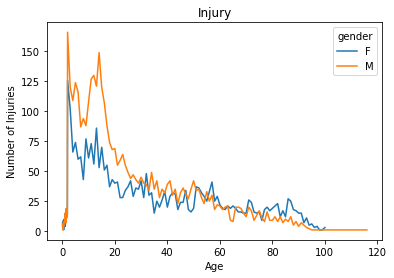

In [32]:
graph=sns.lineplot(x='year', y='frequency',hue='gender',data=graphdf)
graph.set(title='Injury', xlabel='Age', ylabel='Number of Injuries')